# Сравнение вклада и накопления
Тут я хочу понять для себя что лучше, вклад или ипотека? Построю модель и посмотрю что выгоднее.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Моделирование
Грубо, но параметры будут неизменяемые, так же добавлю год остановки (нужно же когда-то жить на полную).

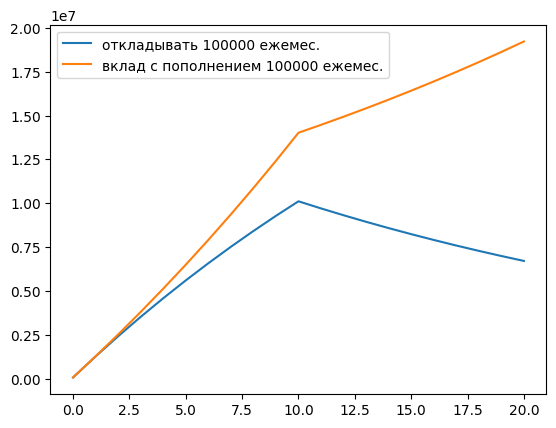

Инфляция: 0.96%
Ключевая ставка: 1.075%
За 20 лет разница составила 12483130 руб.
То есть можно получать каждый месяц 120076 руб.


In [2]:
депозит = 100_000
ежемесячное_пополнение = 100_000
лет = 20
год_остановки = 10

ключевая_ставка = 1 + 7.5 / 100
инфляция = 1 - 4.0 / 100

откладывать = { 0: депозит }
вклад_с_поплнением = { 0: депозит }

период = np.arange(1, 1 + лет)

for год in период:
    пополнение = ежемесячное_пополнение * 12 if год <= год_остановки else 0
    вклад_с_поплнением[год] = вклад_с_поплнением[год - 1] * ключевая_ставка * инфляция + пополнение
    откладывать[год] = откладывать[год - 1] * инфляция + пополнение
    
plt.plot(откладывать.keys(), откладывать.values(), label = f'откладывать {ежемесячное_пополнение} ежемес.')
plt.plot(вклад_с_поплнением.keys(), вклад_с_поплнением.values(), label = f'вклад с пополнением {ежемесячное_пополнение} ежемес.')

plt.legend()
plt.show()
print(f'Инфляция: {инфляция}%')
print(f'Ключевая ставка: {ключевая_ставка}%')
print(f'За {лет} лет разница составила {int(вклад_с_поплнением[лет] - откладывать[лет])} руб.')
print(f'То есть можно получать каждый месяц {int(вклад_с_поплнением[лет] * (ключевая_ставка - 1) / 12)} руб.')